<a href="https://colab.research.google.com/github/ppprakharr/ClassificationModels/blob/main/WineQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data Collection

In [2]:
# loading the dataset
wine_dataset = pd.read_csv('/content/winequality-red.csv')

In [5]:
wine_dataset.shape

(1599, 12)

In [6]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking for missing or null values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visualisation

In [3]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


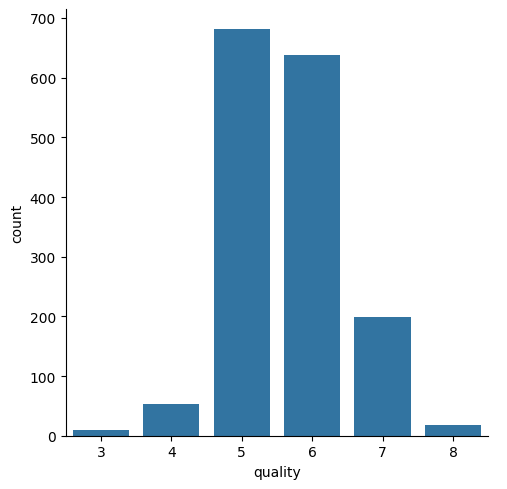

In [8]:
# number of values for each quality
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

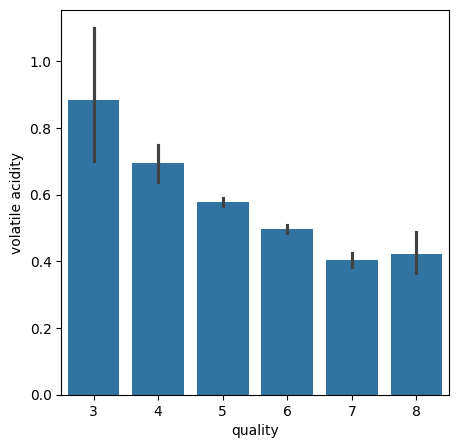

In [9]:
# compare volatile_acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

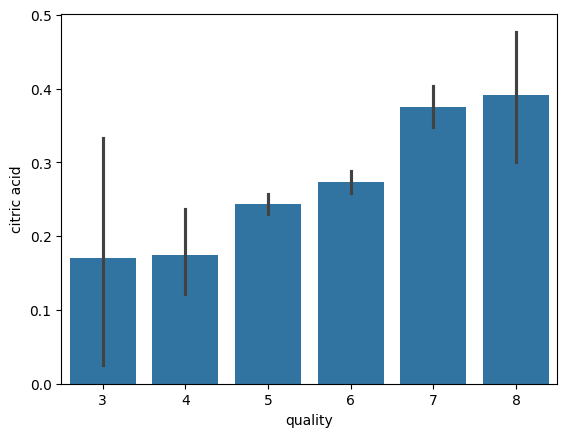

In [10]:
# compare citric acidity vs quality
sns.barplot(x='quality',y='citric acid', data=wine_dataset)


<Axes: xlabel='quality', ylabel='residual sugar'>

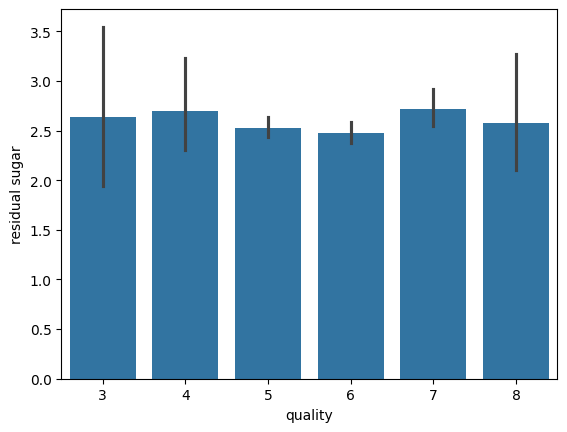

In [11]:
# compare residual sugar vs quality
sns.barplot(x='quality',y='residual sugar', data=wine_dataset)

<Axes: xlabel='quality', ylabel='fixed acidity'>

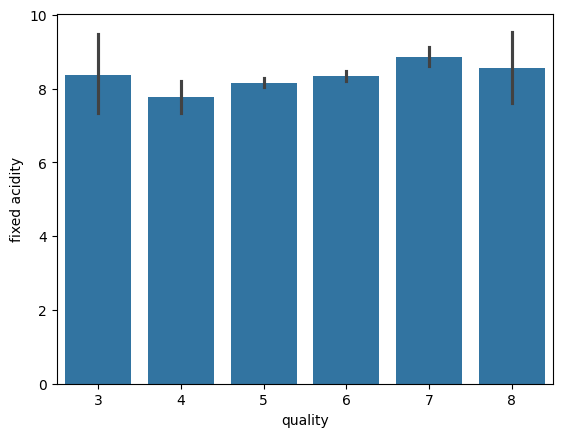

In [12]:
#compare fixed acidity vs quality
sns.barplot(x='quality',y='fixed acidity', data=wine_dataset)

<Axes: xlabel='quality', ylabel='pH'>

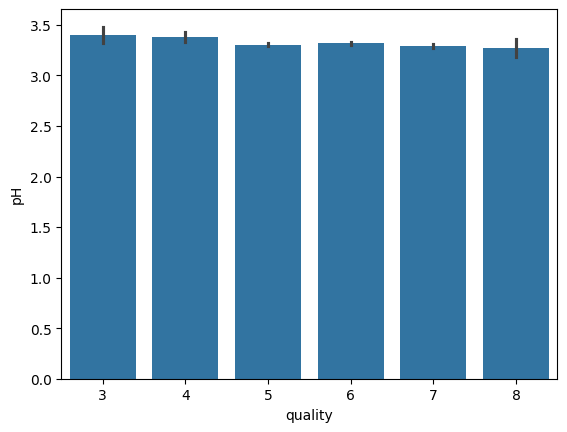

In [14]:
#compare ph vs quality
sns.barplot(x='quality',y='pH', data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

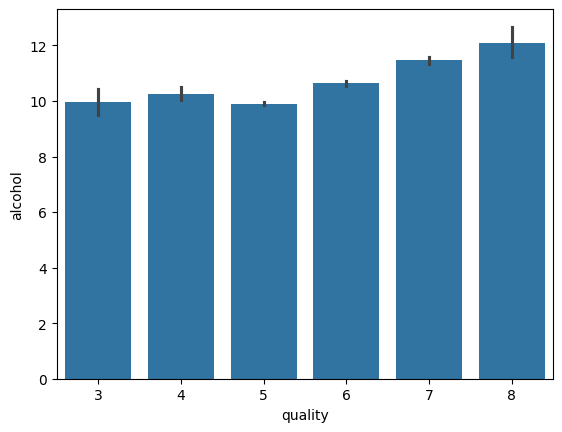

In [15]:
# compare alcohol v quality
sns.barplot(x='quality',y='alcohol', data=wine_dataset)

Find the correlation between all quality and column


In [16]:
correlation = wine_dataset.corr()


<Axes: >

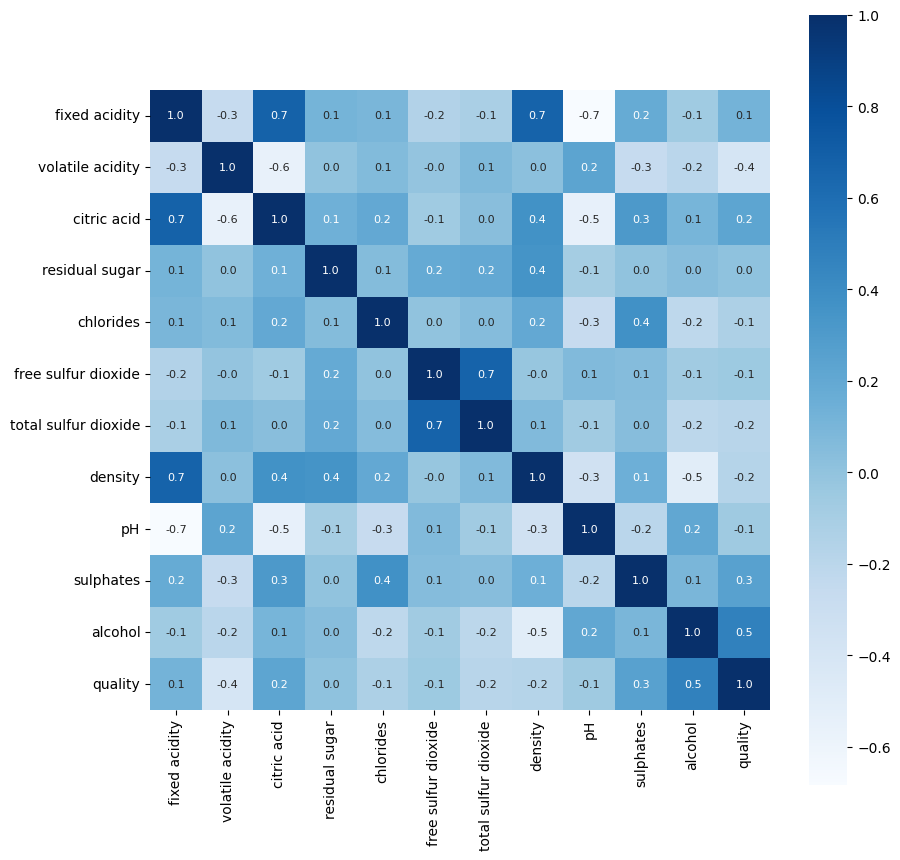

In [19]:
# constructing the heatmap to understadn the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='0.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Data Preprocessing

In [21]:
x=wine_dataset.drop(columns = 'quality',axis=1)
y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value >=7 else 0)
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

SPLITTING TRAINING AND TESTING DATA

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

Model Training : Random Forest classifier

In [24]:
model = RandomForestClassifier()

In [26]:
model.fit(x_train, y_train)


RandomForestClassifier()

Model Evaluation

In [27]:
#accuracy on test data
x_test_predict = model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict, y_test)
print("accuracy score of model for test data: ",test_data_accuracy)


accuracy score of model for test data:  0.925


Buidling a Predictive System

In [34]:
input_data = (7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4)
#changing the list to numpy
input_array_as_numpy = np.asarray(input_data)
#reshape the data for predicting one data
input_data_reshape = input_array_as_numpy.reshape(1,-1)
prediction = model.predict(input_data_reshape)
# print(prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
if(prediction[0]==1):
  print('Good Quality score')
else:
  print('Bad Quality score')

Bad Quality score
